<a href="https://colab.research.google.com/github/ciepielajan/Tweets_Teslas_Stock/blob/main/Tweets_Teslas_Stock.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import json
import csv
import tweepy
import re
import pandas as pd
from textblob import TextBlob

In [2]:
consumer_key = 'R7DGimRNkT11sbngA0MRqLmNE'
consumer_secret = 'w5Axtw43feejwgmPIhqPhPOt1aHso1Guw1yuFwlmijtlh0vguK'
access_token = '1279486577656295425-l3gaKqKuHQdKl44rPXUc0WYcc26wgq'
access_token_secret = '80dGAdcx6LuoWM1mSt669V5NESP0EOuX1dK8Mianjqxi2'

In [3]:
# hashtag_phrase ="tesla"
hashtag_phrase ="#TSLA"

In [4]:
#create authentication for accessing Twitter
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)

#initialize Tweepy API
api = tweepy.API(auth)

In [5]:
data = []
for tweet in tweepy.Cursor(api.search, q=hashtag_phrase+' -filter:retweets',  lang="en", tweet_mode='extended').items(1000):
# for tweet in tweepy.Cursor(api.search, q=hashtag_phrase,  lang="en", since=date_since,  until=date_until, tweet_mode='extended').items(1000):      
# for tweet in tweepy.Cursor(api.search, q=hashtag_phrase,  lang="en", since=date_since,  until=date_until, tweet_mode='extended').items(1000):      
# for tweet in tweepy.Cursor(api.search, q=hashtag_phrase,  lang="en", tweet_mode='extended').items(1000):      
    data.append(
        [tweet.id_str,
        tweet.created_at,   # create post
        tweet.full_text.replace('\n',' '),   #text
        # tweet.user.screen_name,      #user name
        # [e['text'] for e in tweet._json['entities']['hashtags']],   #hastags
        # tweet.user.followers_count            # followers
        ]    )

In [6]:
# import datetime

In [7]:
# date_since = datetime.datetime(2021, 1, 1, 0, 0, 0)
# date_until =   datetime.datetime(2021, 2, 1, 0, 0, 0)

In [8]:
# # https://stackoverflow.com/questions/63482108/using-search-full-archive-in-tweepy
# search_words = hashtag_phrase
# # date_since = "13-08-2020"
# date_since = "202008130000"
# date_since_pro = "202008130000"
# numTweets = 100

# # # standart search
# # for i in  tweepy.Cursor(api.search, q=search_words, since=date_since).items(numTweets):
# #   print(i)
# # premium search
# for i in  tweepy.Cursor(api.search_full_archive,environment_name='**ENV NAME FROM API**', query=search_words, fromDate=date_since_pro).items(numTweets):
#     print(i)

In [9]:
df_tweets = pd.DataFrame(data, columns=["tweet_id","date","tweet_row"])
df_tweets.head(5)

,tweet_id,date,tweet_row
0,1377026356798701573,2021-03-30 22:34:02,Looking like $TSLA $BIDU $SQ $VIAC are all rec...
1,1377025544596905986,2021-03-30 22:30:48,We did see the Nasdaq bounce higher Friday aft...
2,1377023613325426689,2021-03-30 22:23:07,How does everyone feel on CSCW ? #CSCW $CSCW i...
3,1377021617323323393,2021-03-30 22:15:12,"In this market we call it ""So bearish its has ..."
4,1377019898510118916,2021-03-30 22:08:22,I TOLD U ALL $TSLA #TSLA #Tesla


In [10]:
print("ilość tweetów:", len(df_tweets.index))
print("od:", df_tweets.date.min())
print("do:", df_tweets.date.max())

ilość tweetów: 1000
od: 2021-03-25 13:57:53
do: 2021-03-30 22:34:02


In [11]:
def clear_tweet(sentence):
    sentence = re.sub(r"<[^>]+>", " ", sentence) # remove html tag - na początku żeby nie usunął później placeholderów

    #placehodlery
    sentence = re.sub('[\w\.-]+@[\w\.-]+', '  ', sentence)  # maile
    sentence = re.sub('(https://|http://|)+[A-Za-z]+\.+[A-Za-z]+(\S)+', '  ', sentence)  # linki
    sentence = re.sub('([0-9]{4}|[0-9]{2}|[0-9]{1})(\.|\-|\/)([0-9]{4}|[0-9]{2}|[0-9]{1})(\.|\-|\/)([0-9]{4}|[0-9]{2}|[0-9]{1})', '  ', sentence)  # date
    sentence = re.sub('[0-9]{1,2}(\:|am|pm| am| pm)([0-9]{1,2}|\:|am|pm|)([0-9]{1,2}|\:|am|pm| am| pm|)(([0-9]{1,10})?)', '  ', sentence)  # time
    sentence = re.sub('\s\d+(,\d+)*(\.\d+)?(\%)?\s', '  ', sentence)  # number
    sentence = re.sub('@[A-Za-z0-9\.]+', ' ', sentence)  # @montion
    sentence = re.sub('#[A-Za-z0-9]+', ' ', sentence)  # #hastag

    #czyszczenie
    sentence = re.sub(r"[^a-zA-Z\s]", "", sentence)  # remove punctuations and numbers   nie usuwać <PLACEHOLDERÓW>
    sentence = re.sub(r"\b[A-Za-z]{1}\b", "", sentence)  # remove single characters
    sentence = re.sub("^\s+|\s+$", "", sentence, flags=re.UNICODE) # Remove spaces both in the BEGINNING and in the END of a string:
    sentence = re.sub("\s+", " ", sentence, flags=re.UNICODE) # Remove spaces both in the BEGINNING and in the END of a string:

    # sentence = " ".join(sentence.split(" "))  # Remove ONLY DUPLICATE spaces:
    # sentence = " ".join(sentence) # Remove ONLY DUPLICATE spaces:
    sentence = sentence.lower()

    return sentence

In [12]:
df_tweets["tweet_clean"] = df_tweets["tweet_row"].apply(lambda x: clear_tweet(x))
df_tweets["sentiment_polarity"] = df_tweets["tweet_clean"].apply(lambda x: TextBlob(x).sentiment.polarity)
df_tweets["sentiment_subjectivity"] = df_tweets["tweet_clean"].apply(lambda x: TextBlob(x).sentiment.subjectivity)
df_tweets

,tweet_id,date,tweet_row,tweet_clean,sentiment_polarity,sentiment_subjectivity
0,1377026356798701573,2021-03-30 22:34:02,Looking like $TSLA $BIDU $SQ $VIAC are all rec...,looking like tsla bidu sq viac are all recover...,0.130556,0.675000
1,1377025544596905986,2021-03-30 22:30:48,We did see the Nasdaq bounce higher Friday aft...,we did see the nasdaq bounce higher friday aft...,0.137500,0.437500
2,1377023613325426689,2021-03-30 22:23:07,How does everyone feel on CSCW ? #CSCW $CSCW i...,how does everyone feel on cscw cscw its listed...,-0.016667,0.600000
3,1377021617323323393,2021-03-30 22:15:12,"In this market we call it ""So bearish its has ...",in this market we call it so bearish its has t...,0.000000,0.000000
4,1377019898510118916,2021-03-30 22:08:22,I TOLD U ALL $TSLA #TSLA #Tesla,told all tsla,0.000000,0.000000
...,...,...,...,...,...,...
995,1375086911769862150,2021-03-25 14:07:22,Entry Alert: BTO $RH 3/26 $530.00C @ $4.50 🚩 ...,entry alert bto rh btc tsla spy,0.000000,0.000000
996,1375086059760025604,2021-03-25 14:03:59,New Video out on TESLA: https://t.co/SXwwwLjlV...,new video out on tesla,0.136364,0.454545
997,1375085932202881024,2021-03-25 14:03:28,Tesla increases price of Model 3 – its 3rd pri...,tesla increases price of model its rd price ch...,0.000000,0.000000
998,1375084703196217350,2021-03-25 13:58:35,I noticed this weekend that #tsla is now showi...,noticed this weekend that is now showing avail...,0.268182,0.427273


In [13]:
df_tweets["sentiment_polarity_score"] = df_tweets["sentiment_polarity"].apply(lambda x: round(x,0))
df_tweets

,tweet_id,date,tweet_row,tweet_clean,sentiment_polarity,sentiment_subjectivity,sentiment_polarity_score
0,1377026356798701573,2021-03-30 22:34:02,Looking like $TSLA $BIDU $SQ $VIAC are all rec...,looking like tsla bidu sq viac are all recover...,0.130556,0.675000,0.0
1,1377025544596905986,2021-03-30 22:30:48,We did see the Nasdaq bounce higher Friday aft...,we did see the nasdaq bounce higher friday aft...,0.137500,0.437500,0.0
2,1377023613325426689,2021-03-30 22:23:07,How does everyone feel on CSCW ? #CSCW $CSCW i...,how does everyone feel on cscw cscw its listed...,-0.016667,0.600000,-0.0
3,1377021617323323393,2021-03-30 22:15:12,"In this market we call it ""So bearish its has ...",in this market we call it so bearish its has t...,0.000000,0.000000,0.0
4,1377019898510118916,2021-03-30 22:08:22,I TOLD U ALL $TSLA #TSLA #Tesla,told all tsla,0.000000,0.000000,0.0
...,...,...,...,...,...,...,...
995,1375086911769862150,2021-03-25 14:07:22,Entry Alert: BTO $RH 3/26 $530.00C @ $4.50 🚩 ...,entry alert bto rh btc tsla spy,0.000000,0.000000,0.0
996,1375086059760025604,2021-03-25 14:03:59,New Video out on TESLA: https://t.co/SXwwwLjlV...,new video out on tesla,0.136364,0.454545,0.0
997,1375085932202881024,2021-03-25 14:03:28,Tesla increases price of Model 3 – its 3rd pri...,tesla increases price of model its rd price ch...,0.000000,0.000000,0.0
998,1375084703196217350,2021-03-25 13:58:35,I noticed this weekend that #tsla is now showi...,noticed this weekend that is now showing avail...,0.268182,0.427273,0.0


In [14]:
df_tweets['sentiment_polarity_bins'] = pd.cut(df_tweets['sentiment_polarity'], bins=5, labels=[1, 2, 3, 4, 5])
df_tweets

,tweet_id,date,tweet_row,tweet_clean,sentiment_polarity,sentiment_subjectivity,sentiment_polarity_score,sentiment_polarity_bins
0,1377026356798701573,2021-03-30 22:34:02,Looking like $TSLA $BIDU $SQ $VIAC are all rec...,looking like tsla bidu sq viac are all recover...,0.130556,0.675000,0.0,3
1,1377025544596905986,2021-03-30 22:30:48,We did see the Nasdaq bounce higher Friday aft...,we did see the nasdaq bounce higher friday aft...,0.137500,0.437500,0.0,3
2,1377023613325426689,2021-03-30 22:23:07,How does everyone feel on CSCW ? #CSCW $CSCW i...,how does everyone feel on cscw cscw its listed...,-0.016667,0.600000,-0.0,3
3,1377021617323323393,2021-03-30 22:15:12,"In this market we call it ""So bearish its has ...",in this market we call it so bearish its has t...,0.000000,0.000000,0.0,3
4,1377019898510118916,2021-03-30 22:08:22,I TOLD U ALL $TSLA #TSLA #Tesla,told all tsla,0.000000,0.000000,0.0,3
...,...,...,...,...,...,...,...,...
995,1375086911769862150,2021-03-25 14:07:22,Entry Alert: BTO $RH 3/26 $530.00C @ $4.50 🚩 ...,entry alert bto rh btc tsla spy,0.000000,0.000000,0.0,3
996,1375086059760025604,2021-03-25 14:03:59,New Video out on TESLA: https://t.co/SXwwwLjlV...,new video out on tesla,0.136364,0.454545,0.0,3
997,1375085932202881024,2021-03-25 14:03:28,Tesla increases price of Model 3 – its 3rd pri...,tesla increases price of model its rd price ch...,0.000000,0.000000,0.0,3
998,1375084703196217350,2021-03-25 13:58:35,I noticed this weekend that #tsla is now showi...,noticed this weekend that is now showing avail...,0.268182,0.427273,0.0,3


In [15]:
tweet_polarity = df_tweets["sentiment_polarity"].values
tweet_subjectivity = df_tweets["sentiment_subjectivity"].values

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


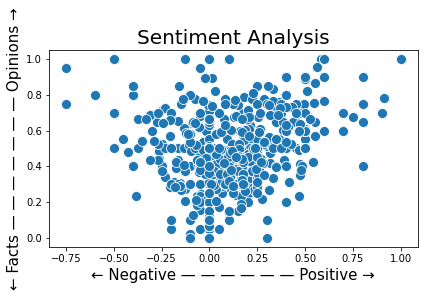

In [17]:
sns.scatterplot(tweet_polarity, # X-axis
                tweet_subjectivity,  # Y-axis
                s=100);

plt.title("Sentiment Analysis", fontsize = 20)
plt.xlabel('← Negative — — — — — — Positive →', fontsize=15)
plt.ylabel('← Facts — — — — — — — Opinions →', fontsize=15)
plt.tight_layout()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


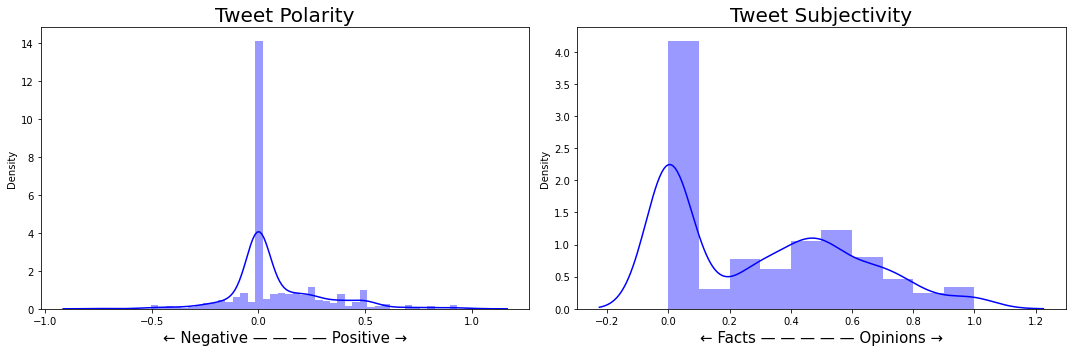

In [18]:
f, axs = plt.subplots(1, 2, figsize=(15,5))

sns.distplot(tweet_polarity, color="b", ax=axs[0])
axs[0].set_title("Tweet Polarity", fontsize = 20)
axs[0].set_xlabel('← Negative — — — — Positive →', fontsize=15)
sns.distplot(tweet_subjectivity, color="b", ax=axs[1])
axs[1].set_title("Tweet Subjectivity", fontsize = 20)
axs[1].set_xlabel('← Facts — — — — — Opinions →', fontsize=15)

plt.tight_layout()

In [21]:
df_tweets = df_tweets.set_index("date")
# df_tweets = df_tweets.reset_index()
df_tweets

,tweet_id,tweet_row,tweet_clean,sentiment_polarity,sentiment_subjectivity,sentiment_polarity_score,sentiment_polarity_bins
date,,,,,,,
2021-03-30 22:34:02,1377026356798701573,Looking like $TSLA $BIDU $SQ $VIAC are all rec...,looking like tsla bidu sq viac are all recover...,0.130556,0.675000,0.0,3
2021-03-30 22:30:48,1377025544596905986,We did see the Nasdaq bounce higher Friday aft...,we did see the nasdaq bounce higher friday aft...,0.137500,0.437500,0.0,3
2021-03-30 22:23:07,1377023613325426689,How does everyone feel on CSCW ? #CSCW $CSCW i...,how does everyone feel on cscw cscw its listed...,-0.016667,0.600000,-0.0,3
2021-03-30 22:15:12,1377021617323323393,"In this market we call it ""So bearish its has ...",in this market we call it so bearish its has t...,0.000000,0.000000,0.0,3
2021-03-30 22:08:22,1377019898510118916,I TOLD U ALL $TSLA #TSLA #Tesla,told all tsla,0.000000,0.000000,0.0,3
...,...,...,...,...,...,...,...
2021-03-25 14:07:22,1375086911769862150,Entry Alert: BTO $RH 3/26 $530.00C @ $4.50 🚩 ...,entry alert bto rh btc tsla spy,0.000000,0.000000,0.0,3
2021-03-25 14:03:59,1375086059760025604,New Video out on TESLA: https://t.co/SXwwwLjlV...,new video out on tesla,0.136364,0.454545,0.0,3
2021-03-25 14:03:28,1375085932202881024,Tesla increases price of Model 3 – its 3rd pri...,tesla increases price of model its rd price ch...,0.000000,0.000000,0.0,3


In [22]:
df_sentiment = df_tweets.resample('D').sum()
df_sentiment

,sentiment_polarity,sentiment_subjectivity,sentiment_polarity_score
date,,,
2021-03-25,1.886599,26.128190,1.0
2021-03-26,18.945108,69.456782,6.0
2021-03-27,9.665745,33.473634,2.0
2021-03-28,10.107882,33.943385,2.0
2021-03-29,17.637366,66.980581,10.0
2021-03-30,22.476238,69.017638,15.0


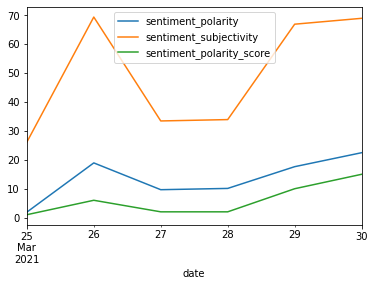

In [23]:
df_tweets.resample('D').sum().plot()

In [24]:
min = df_tweets.index.min()
max = df_tweets.index.max()
max

Timestamp('2021-03-30 22:34:02')

In [25]:
import pandas_datareader.data as web
df_TSLA = web.DataReader(name="TSLA", data_source="stooq", start=min, end=max)
df_TSLA

,Open,High,Low,Close,Volume
Date,,,,,
2021-03-30,601.75,637.66,591.01,635.62,39250449
2021-03-29,615.64,616.48,596.02,611.29,28636985
2021-03-26,641.87,643.82,599.89,618.71,33852827
2021-03-25,613.00,645.50,609.50,640.39,39224850


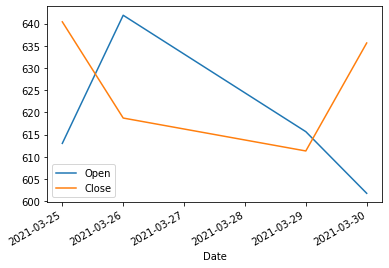

In [26]:
df_TSLA[["Open","Close"]].plot()

`Giełda nie działa w weekend, przez co ma 

In [27]:
df_merge = df_TSLA[["Open","Close"]].merge(df_sentiment["sentiment_polarity"], left_index=True, right_index=True)
df_merge

,Open,Close,sentiment_polarity
2021-03-30,601.75,635.62,22.476238
2021-03-29,615.64,611.29,17.637366
2021-03-26,641.87,618.71,18.945108
2021-03-25,613.00,640.39,1.886599


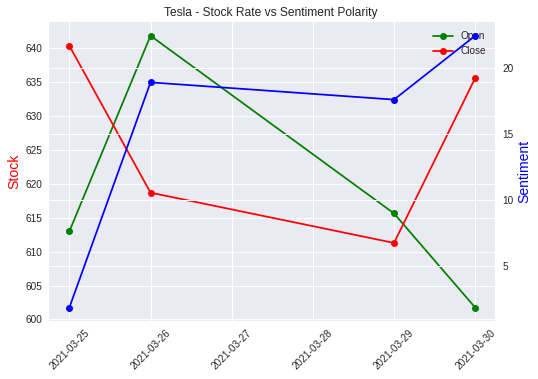

In [30]:
# create figure and axis objects with subplots()
fig,ax = plt.subplots()

plt.title('Tesla - Stock Rate vs Sentiment Polarity ') # tytuł
plt.style.use("seaborn")  # nadaje kratownice fajne
plt.xticks(rotation=45)


# make a plot
ax.plot(df_merge.index,    # dane źródło 1
            df_merge["Open"],
        color="green",
        marker="o",
         label="Open"
         )
# set x-axis label
plt.legend()
# make a plot
ax.plot(df_merge.index,    # dane źródło 1
            df_merge["Close"],
        color="red",
        marker="o",
         label="Close")
ax.set_ylabel("Stock",color="red",fontsize=14)
plt.legend()
# twin object for two different y-axis on the sample plot
ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(df_merge.index,    # dane źródło 1
            df_merge["sentiment_polarity"], 
         color="blue",
         marker="o",
        #  label="sentiment polarity"
         )
ax2.set_ylabel("Sentiment",color="blue",fontsize=14)
# plt.legend()
plt.show()
